<a href="https://colab.research.google.com/github/Celia-git/4220_Homework/blob/main/Copy_of_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

This homework is intended to give you experience with hypothesis testing, using random chance to establish an empirical distribution, theoretical probability, and using Bayesian inference.

When you have completed the assignment, download only the ipynb file and submit it to Ilearn.

**This HW is due Friday, February 21 at 11:59 PM.**

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Parker Lovin Danny Vela Hernandez**

**Q5 is completed with the file Deflategate.csv, included in my submission.  Import Deflategate.csv to see the outputs to Q5**

In [71]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import scipy

## Install Packages

Even if you have installed all packages needed, RUN THIS CELL! On google colab, it downloads the test files, and whether on colab or to give you automated feedback!

If you complete the homework in a local IDE, you will need to download the files hw2.ok and ok_tests.zip.

Before packages can be imported in python they must be installed. In the next cell the packages that this homework requires are installed. After the installation, you may need to restart the environment to ensure that the imports function. Once they are installed, the restart is not necessary.

In [72]:
from pathlib import Path
import sys
import gdown

ok_file = "hw2.ok"

code_ok = "15HYBnY2MplvV3Z0rz9wSJFug5nualvy6"
code_tests = "1kwJZ2Vw5eJApS1Y-jYr3iQZ0d0koWY5i"

hw_ok_link = f"https://drive.google.com/uc?id=" + code_ok
ok_tests_link = "https://drive.google.com/uc?id=" + code_tests

# Download necessary files for autograding
# This only works on google drive.
if 'google.colab' in sys.modules:
  import google.colab.output
  gdown.download(hw_ok_link)
  gdown.download(ok_tests_link)

# If the ok_tests.zip file is present - decompress it
file_path = Path("ok_tests.zip")
if file_path.exists():
  !unzip -o ok_tests.zip

# download necessary libraries
pip_output = !pip3 install okpy numpy matplotlib pandas datascience

# This makes any errors and output less horrible
err_lines = [ln for ln in pip_output if 'error' in ln.lower()]

# If this is google colab - make the output look nice
if 'google.colab' in sys.modules:
  google.colab.output.clear()

if err_lines:
  print(*err_lines, sep='\n')
else:
  print('Libraries successfully installed')

# Verify the necessary grader files are present
file_path = Path("ok_tests")
if not file_path.exists():
  print("No test cases found. Please download ok_tests.zip and unzip into this directory")
  print("The ok tests file is available at: ", "https://drive.google.com/file/d/"+code_tests+"/view?usp=share_link")

file_path = Path(ok_file)
if not file_path.exists():
  print("No grader file found. Please download hwX.ok")
  print("ok file is available at: ", "https://drive.google.com/file/d/"+code_ok+"/view?usp=share_link")

Libraries successfully installed


In [106]:
from client.api.notebook import Notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd

ok = Notebook(ok_file)

Assignment: Homework 2
OK, version v1.18.1



# Q1

Thomas Bayes introduced the infamous Bayes rule. When Bayes would explain the rule, he often used a game to show the utility of his discovery.

With his back turned, he would ask someone to mark a spot on a table. He would never look, but instead he would have people throw a ball and then they would tell him if the ball landed to the right of the mark or to the left. He would continue this for a number of rounds.

Based on this alone, Bayes would work out the location of the mark on the table by the end of the game! We will do the exact same thing in code to further develop an understanding of Bayes rule.  

## Q1a

Fill in the get_position() function to return a random number with uniform distribution between 0 and 10.

Fill in the to_the_right() function to return true if new_position is greater than the first_position.

In [74]:
def get_position():
  return random.uniform(0, 10)

def to_the_right(first_position, new_position):
  return new_position > first_position

random.seed(42)
first_position = get_position()

In [75]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Q1b

Create a column in candidate_positions called 'p_true_given_pos'. In this column, store the probability that a ball is thrown with uniform probability at a wall and strikes to the right of the position if the index is understood to be the position. ie. row zero is position zero and should have probability equal to 1.

In [76]:
def get_bayes_df():
  candidate_positions = pd.DataFrame([1/10 for num in range(1,11)],columns=['probability'])
  candidate_positions['p_true_given_pos'] = [(10-i)/10 for i in range(10)]
  return candidate_positions


candidate_positions = get_bayes_df()

In [77]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Q1c

Update the belief (called probability) using Bayes rule.

First, you will need to compute the expected probability of a ball striking the wall to the right of a location given the current probabilities for each location. This should be stored in expected_p_true. The complement should be stored in expected_p_false.

Next, update the probability associated with each position with the new probabilities based on whether each new observation is to the right (true) or to the left (false) of the first position using Bayes rule. Below are a few restatements of Bayes rule that may be helpful. I recommend using vectorized math by using the columns as operands to do this concisely.


$P(A|B) = P(A) \cdot \frac{P(B|A)}{P(B)}$

$posterior = prior \cdot \frac{P(observation|prior)}{P(observation)}$

$P_{new} = P_{current} \cdot \frac{P(observation|P_{current})}{P(observation)}$

Experiment with the number of iterations (by passing in a keyword argument to Bayes_game) used to find a number that allows the probability to converge. Update, required_iterations with the value that you find sufficient for the probabilities to converge and enable correct inference.



In [78]:
def Bayes_game(iterations=20, candidate_positions=candidate_positions):

  successes = []
  failures = []

  for i in range(iterations):
    new_position = get_position()
    expected_p_true = sum(candidate_positions["probability"] * candidate_positions["p_true_given_pos"])
    expected_p_false = 1 - expected_p_true

    if to_the_right(first_position, new_position):
      candidate_positions['probability'] = (candidate_positions["probability"] * candidate_positions["p_true_given_pos"])/expected_p_true
      successes.append(new_position)

    else:
      candidate_positions['probability'] = (candidate_positions["probability"] * (1- candidate_positions['p_true_given_pos']))/expected_p_false
      failures.append(new_position)

  return candidate_positions, successes, failures

candidate_positions, successes, failures = Bayes_game()

required_iterations = Bayes_game(500)

,probability,p_true_given_pos
0,0.000000e+00,1.0
1,1.667747e-197,0.9
2,9.039503e-106,0.8
3,2.833279e-57,0.7
4,1.298660e-27,0.6
5,1.276176e-09,0.5
6,7.574726e-01,0.4
7,2.425274e-01,0.3
8,2.946207e-14,0.2
9,1.849233e-52,0.1


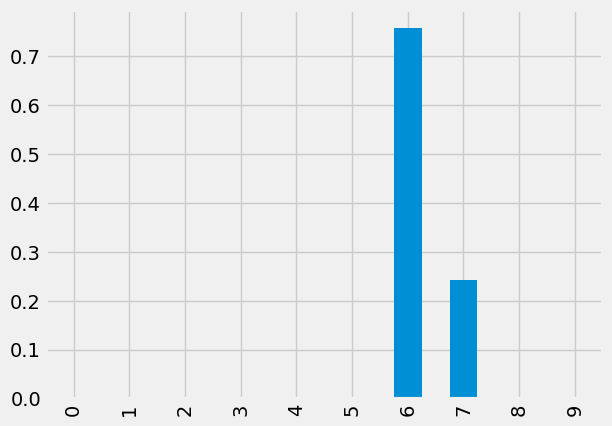

In [79]:
candidate_positions['probability'].plot(kind='bar')
candidate_positions

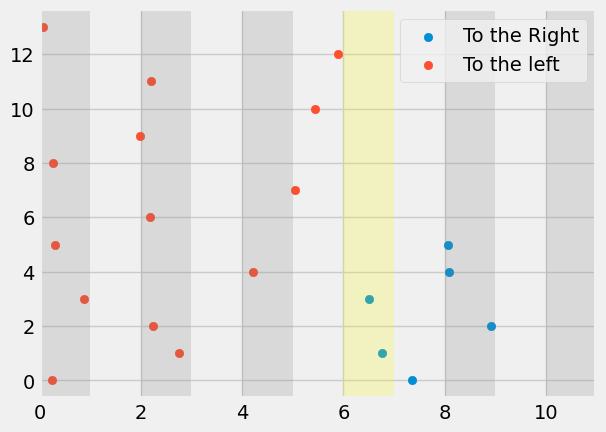

In [80]:
# function to alternate background color
def alt_bands(ax=None, highlight = None):
    ax = ax or plt.gca()
    ax.set_xlim(0, 11)
    x_left, x_right = ax.get_xlim()
    locs = ax.get_xticks()
    count = 0
    for loc1, loc2 in zip(locs[::1], np.concatenate((locs, [x_right]))[1::1]):
        if count == highlight:
          ax.axvspan(loc1, loc1+1, facecolor='yellow', alpha=0.2)
        else:
          ax.axvspan(loc1, loc1+1, facecolor='gray', alpha=0.2)
        count+= 1
    ax.set_xlim(0, 11)


plt.scatter(successes, range(len(successes)))
plt.scatter(failures, range(len(failures)))
alt_bands(plt.gca(), highlight=3)
plt.legend(("To the Right", "To the left"))

## Q1d

When the results are displayed above for the simulation, the correct answer becomes clear. However, it's important to remember, your update of the probability did not have access to the location of the ball at any time. Rather, it is only told whether the ball hit to the left or to the right.

In your own words, provide an explanation for the intuition captured in Bayes rule for updating probabilities in Bayes game. Why does this work?



Each time the ball lands, the player knows whether it has landed to the left or to the right of the mark.  This helps the player update their understanding of the mark's location.  Therefore, the player's guesses become successivelt more accurate as new candidate positions are added.

# Q2

Monte carlo simulation is a method of using random occurence to estimate outcomes.

## Q2a

Use list comprehension to generate an array of random values with length equal to trial and distributed between -0.5 and 0.5. This will be done twice to estimate x values and y values that are inside of a 1x1 square centered at (0,0).

Next, decide if each x y pair stored as `(guesses_x[0], guesses_y[0])` is within a circle of radius 0.5 which is centered at zero. This can be done finding the distance of each pair from zero and comparing this to the radius. Perform these operations using vectorized operations.

Finally, plot the points using a scatter plot. The points within the circle and without must be different colors.

Hint: combine guesses_x, guesses_y, and successes into a dataframe. Then use df.plot.scatter and use the c keyword argument to control the color.

3.1478


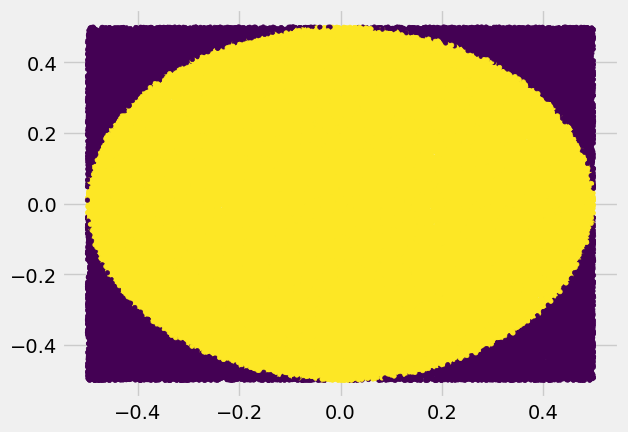

In [81]:
trials = 100000
random.seed(32)

guesses_x = np.random.uniform(-.5, .5, trials)
guesses_y = np.random.uniform(-.5, .5, trials)
successes = ((guesses_x ** 2) + (guesses_y ** 2)) <= (.5 ** 2)
print(np.sum(successes)/(trials*0.5**2))
df = pd.DataFrame({
    "X Guess":guesses_x,
    "Y Guess":guesses_y,
    "Successes":successes
})

# Plotting
plt.scatter(df['X Guess'], df['Y Guess'], c=df['Successes'], s=10)
plt.show()

In [82]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q2a > Suite 1 > Case 1

>>> np.isclose(np.sum(successes)/(trials*0.5**2), 3.14832)
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q2a --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



Notice, the probability of a random location being within a certain distance of a point is a function of pi! Hmm... I wonder if this has anythign to do with the $\pi$ in the normal distribution formula?

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{[-\frac{(x-\mu)^{2}}{2\sigma^{2}}]}$

## Q2b

Explore the formulation of the normation distribution and how it relates to $\pi$. Enter the prompt below in a large language model and consider its response.

Prompt: `
Explain the connection between the probability of a point lying within a distance of a location and the normal distribution. Point out how the probability changes with the square root of the distance. Specifically, connect these to the existence of pi in the normal distribution.`

Is the $\pi$ in the normal distribution connected to the simulation above? If so, how?

Answer:


The area of a circle, which is a function of pi and r^2, is directly correlated with the probability of a point landing within the circle.  As the circle grows, so does the probability that a point will land in it, as does r^2.  The normal distribution includes pi because it is a factor in the area of a circle.   


## Question 3 ##

Let $n$ be a positive integer and let $s$ be an integer such that $0 \le s \le n$. Consider a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Provide a math expression for the probability that the number of successes in the sample is at most $s$.

In probability classes this probability will typically be denoted $P(S \le s)$ where $S$ denotes the random number of successes in the sample. Formal definitions of the pieces of this notation aren't particularly helpful for our purposes. Just read it as "the probability that the number of successes is at most $s$."


Hint:

**Binomial distribution**

$\sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$

### Q3a ###

Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined in Part **a**. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0."

It might help to refer to the calculation in Question 1b.

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 1
-->

In [83]:
def nCr(n, k):
  return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

def get_prob(p, n, k):
  return nCr(n, k) * (p**k) * ((1-p)**(n-k))

def prob_at_most(n, p, s):
    """
    returns the probability of S <= s
    Input n: sample size; p : proportion; s: number of successes at most"""
    if p > 1 or s > n: return 0
    prob = 0
    for k in range(s+1):
      prob += get_prob(p, n, k)
    return prob

In [84]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Q3b

The sum of successes is a sample statistic. A similar probability can be developed by empirically discovering the distribution of the statistic given the number of trials.

Empirically estimate the PDF through sampling (as done in the in-class exercise) and kernel density estimation. Use the returned PDF to estimate the probability that $P(S \le s)$ given a sample size $n = 12$. Your function should appropriately integrate the PDF using scipy for any value of $s$.

This process should look remarkably similar to the empirical distribution of the distribution of the statistical mean.


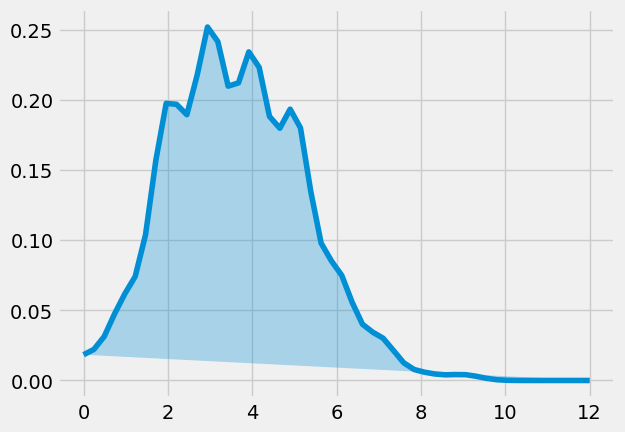

0.9850406847023283


In [85]:
n = 12
p = 0.3
s = 8
max_samples = 1000



def get_samples(n, p, max_samples):
    samples = []
    for i in range(max_samples):
        sum_successes = 0
        for j in range(n):
            success = random.uniform(0, 1)
            if success < p:
                sum_successes += 1
        samples.append(sum_successes)
    return samples


successes = get_samples(n, p, max_samples)
kernel = scipy.stats.gaussian_kde(successes)
x = np.linspace(0, n)
pdf = kernel(x)

def prob_at_most_empirical(s, pdf, n=12, p=0.3):
    """
    returns the probability of S <= s
    Input n is set to 12; p is set to 0.3; s: number of successes at most.
    Explicitly uses the pdf of the statistical number of successes to estimate
    the probability of less than or equal to the value s."""

    return scipy.integrate.quad(kernel, 0, s)[0]


probability = prob_at_most_empirical(s, pdf)

plt.plot(x, pdf)
plt.fill(x, pdf, alpha=.3)
plt.show()
print(probability)



### Q3c ###
In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

<!--
BEGIN QUESTION
name: q2c
manual: false
points: 1
-->

In [86]:
p_majority = prob_at_most(200, .45, 100)
p_majority

0.9319247501372618

In [87]:
ok.grade("q3c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Q3d ###
Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **c**, independently of the samples drawn by the other organizations.

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

<!--
BEGIN QUESTION
name: q2d
manual: false
points: 2
-->

In [88]:
complement = (3 * prob_at_most(200, .45, 100) + prob_at_most(300, .45, 150) + prob_at_most(400, .45, 200))/5
prob_3d = 1 - complement
prob_3d

0.052075905812333345

In [89]:
ok.grade("q3d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# Q4

Hypothesis testing and Bias

## Q4a

In the course textbook, read section [11.1](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html).

This section is a wonderful explanation of hypothesis testing and a real world application. The code provided in the chapter uses special toolboxes built for that course. However, there's no need for those toolboxes. Recreate the entirety of their code here without using their specialized toolbox. Rather, use the standard tools which we have seen in class.

Your code should recreate images as well as performing all operations. The images do not have to look indentical but must show the same information.

Note: The content of this section is assigned due to its relevance to hypothesis testing and the impact of the application. It's inclusion is not an endorsement of any opinions that are offered by the authors of that section, and neither is this statement an indication of disagreement. Each student should come to their own conclusions regarding any opinion based claims in the reading.

In [90]:
def sample_proportions(sample_size, population_proportions):
  jury0 = np.random.binomial(sample_size, population_proportions[0])/sample_size
  return (jury0, 1-jury0)

In [91]:
def one_simulated_count(sample_size, eligible_population):
  jury0 = np.random.binomial(sample_size, eligible_population[0])
  return (jury0, sample_size - jury0)

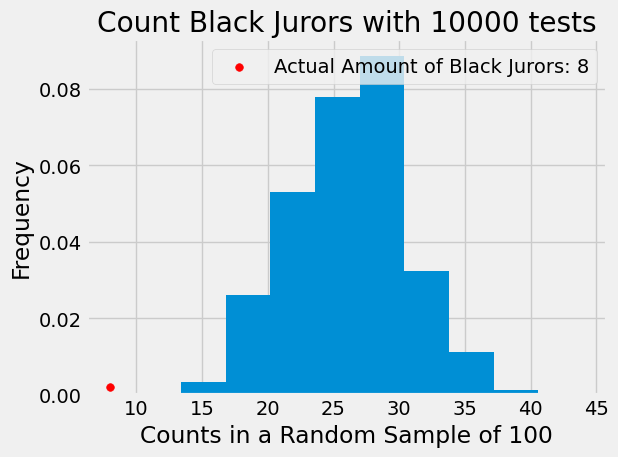

In [92]:

sample_size = 100
eligible_population = [0.26, 0.74]


repetitions = 10000
counts = np.array([])
for i in np.arange(repetitions):
  counts = np.append(counts, one_simulated_count(sample_size, eligible_population)[0])


plt.title(f"Count Black Jurors with {repetitions} tests")
plt.xlabel(f"Counts in a Random Sample of {sample_size}")
plt.ylabel("Frequency")
plt.hist(counts, density=True)
plt.scatter(8, .002, color="red", s=30, label="Actual Amount of Black Jurors: 8")
plt.ylim(0, max(plt.ylim()[1], 0.052))
plt.tight_layout()
plt.legend()
plt.show()

## Q4b

Extend their results. The above stops after showing the number of black jurors on the panel seems improbable given the histogram. Here, you should also estimate the PDF with KDE and find the probability of having a sum of 8 or fewer jurors on the panel.

In [93]:
successes = get_samples(sample_size, eligible_population[0], repetitions)
kernel = scipy.stats.gaussian_kde(successes)
x = np.linspace(0, sample_size)
pdf = kernel(x)

empirical_prob = prob_at_most_empirical(8, pdf, sample_size, eligible_population[0])

print(f"Probability that 8 or fewer  jurors are black is less than {empirical_prob/100:.10f} percent: {(empirical_prob * 1000000):.6f} / 1 million")

Probability that 8 or fewer  jurors are black is less than 0.0000000765 percent: 7.645105 / 1 million


# Q5

## Q5a

In the course textbook, read section [12.3](https://inferentialthinking.com/chapters/12/3/Deflategate.html).

This section introduces the idea of comparing distinct groups as opposed to evaluating one group. It uses a type of hypothesis test based on permuting labels and evaluating the impact on the statistic. The idea is that if an assignment to one label or another is actually random, then reshuffling those labels shouldn't change anything.

Rewrite the code from this section without the use of any specialized toolboxes. Compute the p value by obtaining the test statistic PDF through KDE and integrating appropriately.  

Your code should recreate images as well as performing all operations. The images do not have to look indentical but must show the same information.


Note: The content of this section is assigned due to its relevance to hypothesis testing and the impact of the application. It's inclusion is not an endorsement of any opinions that are offered by the authors of that section, and neither is this statement an indication of disagreement. Each student should come to their own conclusions regarding any opinion based claims in the reading.

In [94]:
football = pd.read_csv("Deflategate.csv")
print(football)

        Team  Blakeman  Prioleau
0   Patriots     11.50     11.80
1   Patriots     10.85     11.20
2   Patriots     11.15     11.50
3   Patriots     10.70     11.00
4   Patriots     11.10     11.45
5   Patriots     11.60     11.95
6   Patriots     11.85     12.30
7   Patriots     11.10     11.55
8   Patriots     10.95     11.35
9   Patriots     10.50     10.90
10  Patriots     10.90     11.35
11     Colts     12.70     12.35
12     Colts     12.75     12.30
13     Colts     12.50     12.95
14     Colts     12.55     12.15


In [95]:
football['Combined'] = (football.iloc[:, 1] + football.iloc[:, 2])/2
football.head()

,Team,Blakeman,Prioleau,Combined
0,Patriots,11.50,11.80,11.650
1,Patriots,10.85,11.20,11.025
2,Patriots,11.15,11.50,11.325
3,Patriots,10.70,11.00,10.850
4,Patriots,11.10,11.45,11.275


In [96]:
np.ones(11)
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [97]:
drop = start - football["Combined"]
football["Pressure Drop"] = drop
football

,Team,Blakeman,Prioleau,Combined,Pressure Drop
0,Patriots,11.50,11.80,11.650,0.850
1,Patriots,10.85,11.20,11.025,1.475
2,Patriots,11.15,11.50,11.325,1.175
3,Patriots,10.70,11.00,10.850,1.650
4,Patriots,11.10,11.45,11.275,1.225
5,Patriots,11.60,11.95,11.775,0.725
6,Patriots,11.85,12.30,12.075,0.425
7,Patriots,11.10,11.55,11.325,1.175
8,Patriots,10.95,11.35,11.150,1.350
9,Patriots,10.50,10.90,10.700,1.800


In [98]:
football.groupby("Team")["Pressure Drop"].mean()

,Pressure Drop
Team,
Colts,0.468750
Patriots,1.202273


### Q5b

Conduct a two sample ttest across the samples for each team's game balls using `ttest_ind` which is part of the scipy stats package.

What is the null hypothesis of this test? Does the result support the conclusion from the p value in above?

Answer:

Null Hypothesis: The 11 Patriot drops look like a random sample of 11/15 total pressure drops, when the remaining four are Colts' drops.

In [99]:
def difference_of_means(df, group_label):
  observed_means = df.groupby(group_label)["Pressure Drop"].mean()
  return observed_means["Patriots"] - observed_means["Colts"]

print(difference_of_means(football, "Team"))

0.733522727272728


In [100]:
shuffled_labels = football["Team"].sample(frac=1, replace=False, random_state=42).reset_index(drop=True)
original_and_shuffled = football.copy()
original_and_shuffled["Shuffled Label"] = shuffled_labels
original_and_shuffled

,Team,Blakeman,Prioleau,Combined,Pressure Drop,Shuffled Label
0,Patriots,11.50,11.80,11.650,0.850,Patriots
1,Patriots,10.85,11.20,11.025,1.475,Colts
2,Patriots,11.15,11.50,11.325,1.175,Patriots
3,Patriots,10.70,11.00,10.850,1.650,Colts
4,Patriots,11.10,11.45,11.275,1.225,Patriots
5,Patriots,11.60,11.95,11.775,0.725,Patriots
6,Patriots,11.85,12.30,12.075,0.425,Patriots
7,Patriots,11.10,11.55,11.325,1.175,Patriots
8,Patriots,10.95,11.35,11.150,1.350,Colts
9,Patriots,10.50,10.90,10.700,1.800,Patriots


In [101]:
print(difference_of_means(original_and_shuffled, "Shuffled Label"))

-0.3147727272727274


In [102]:
print(difference_of_means(original_and_shuffled, "Team"))

0.733522727272728


In [103]:
def one_simulated_difference(i):
  shuffled_labels = football["Team"].sample(frac=1, replace=False, random_state=i).reset_index(drop=True)
  shuffled_table = football[["Pressure Drop"]].copy()
  shuffled_table["Shuffled Label"] = shuffled_labels
  return difference_of_means(shuffled_table, "Shuffled Label")


repetitions = 10000
differences = np.zeros(repetitions)
for i in np.arange(repetitions):
  differences[i] = one_simulated_difference(i)

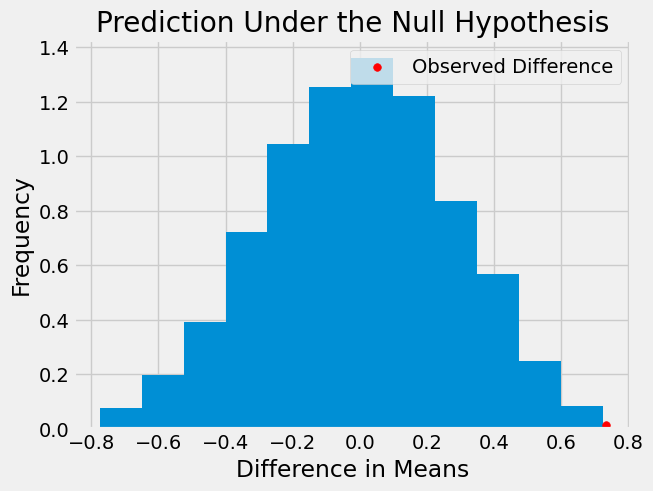

In [104]:
observed_difference = difference_of_means(football, "Team")
hist, bin_edges = np.histogram(differences)
plt.hist(differences, bins=np.arange(min(differences), max(differences), 0.125), density=True)
plt.scatter(observed_difference, hist[0]/sum(hist), color="red", s=30, label="Observed Difference")
plt.title("Prediction Under the Null Hypothesis")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [105]:
empirical_prob = np.count_nonzero(differences >= observed_difference)/repetitions
empirical_prob

0.0027